# Decision Tree with the Wine Dataset

In [1]:
# Importing the required modules for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [2]:
# Load data
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
print(dir(wine))
print(wine.feature_names)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [4]:
# EDA
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['Class'] = wine.target
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Class  
0           

In [5]:
## Data size
print(df.shape)

(178, 14)


In [6]:
## Describing data
print(df.describe())
print(df['Class'].unique())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [7]:
# Data cleaning
## Data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Class

In [8]:
## Null values
print(df.isna().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Class                           0
dtype: int64


In [9]:
## Duplicates
print(df.duplicated().sum())

0


In [10]:
# Data correlation
corr = df.corr()
print(corr)

                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
Class                        -0.328222    0.437776 -0.049643   

                              alcalinit

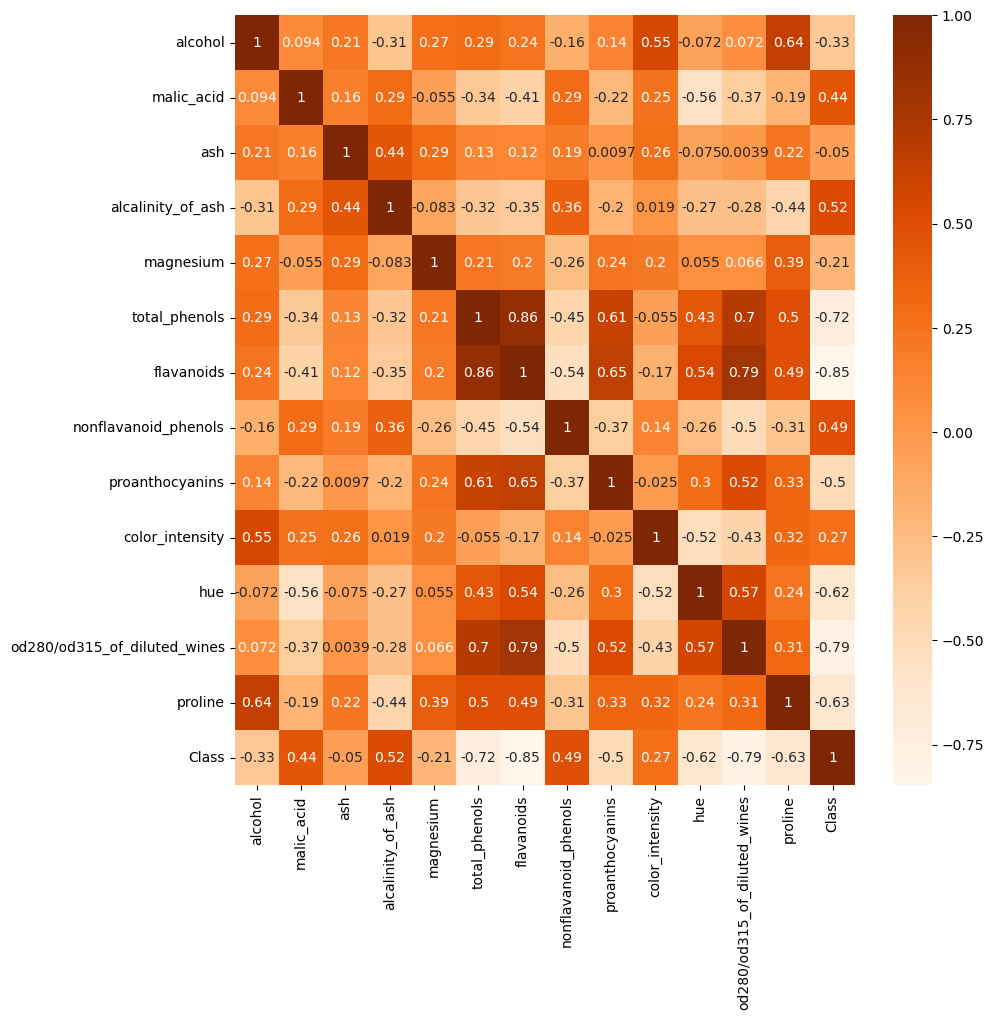

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Oranges', annot=True, xticklabels=True, yticklabels=True)
plt.show()

[0 1 2]
1    71
0    59
2    48
Name: Class, dtype: int64


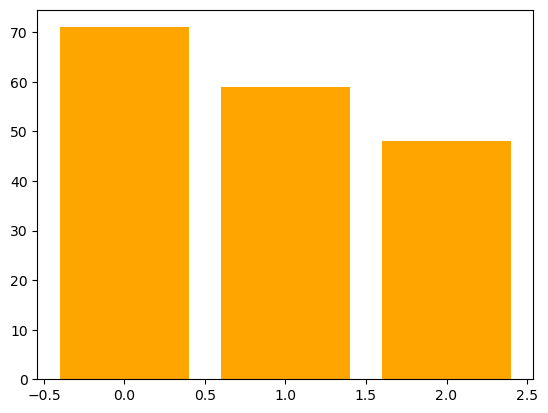

In [12]:
# Numbers of data according to class
print(df['Class'].unique())
print(df['Class'].value_counts())
plt.bar(df['Class'].unique(), df['Class'].value_counts(), color='Orange')
plt.show()

In [13]:
# Separate train and test data
features = df.drop('Class', axis=1)
labels = df['Class']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=12345)

In [14]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Setting up the model object
model = DecisionTreeClassifier(random_state=0)

In [16]:
# Perform model training using train dataset from the split
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
# Perform prediction using the Test data (choose the relevant test data)
y_pred = model.predict(X_test_scaled)

In [18]:
# Perform model evaluation
print(model.score(X_test_scaled, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9166666666666666
[[12  2  0]
 [ 0 11  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.79      1.00      0.88        11
           2       1.00      0.91      0.95        11

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.93      0.92      0.92        36



In [19]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini', 'entropy', 'log_loss']}
grid = GridSearchCV(model, param_grid=parameters)
grid.fit(X_train_scaled, y_train)
y_pred = grid.predict(X_test_scaled)

print(grid.score(X_test_scaled, y_test))
print(grid.best_params_)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9722222222222222
{'criterion': 'entropy'}
[[12  0  0]
 [ 0 13  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.91      0.95        11

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



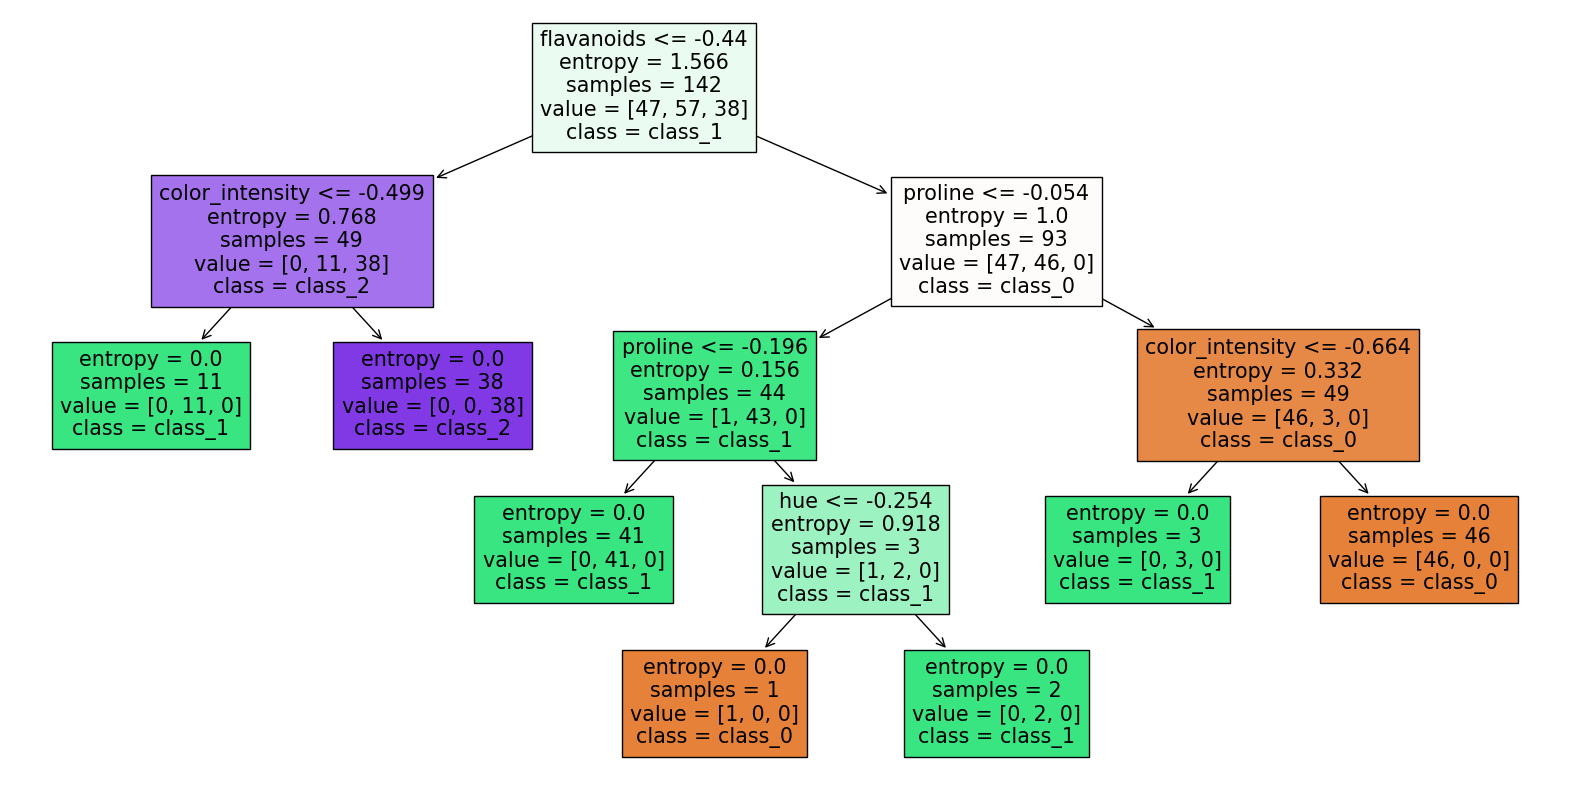

In [20]:
# Extra: You can plot the decision tree to observe how it is configured
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(grid.best_estimator_, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()